# Exploratory Data Analysis on Plastic Pollution 2000-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## ALL MEASURUS IN Tonnes (t) of plastics in Mio. t 

In [3]:
plastic_df = pd.read_csv('../data/cleaned_data/cleaned_data_final.csv')

plastic_df = plastic_df.drop(columns=['Unnamed: 0'])

plastic_df.head()

,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
0,CAN1,Canada,2000,CAN12000,0.151097,3.386902,0.008696,0.485324,0.127029,4.159048,0.109,5.5582,0.258
1,CAN1,Canada,2001,CAN12001,0.156862,3.495910,0.008903,0.490428,0.138619,4.290722,0.110,5.5922,0.281
2,CAN1,Canada,2002,CAN12002,0.164828,3.649937,0.009273,0.500955,0.152728,4.477721,0.113,5.8427,0.308
3,CAN1,Canada,2003,CAN12003,0.172013,3.785881,0.009570,0.508120,0.166722,4.642306,0.114,5.9738,0.335
4,CAN1,Canada,2004,CAN12004,0.180220,3.941340,0.009938,0.516935,0.182366,4.830799,0.117,6.2353,0.366


In [4]:
plastic_df.dtypes

location_code                   object
location                        object
time                             int64
location_time                   object
incinerated_waste              float64
landfilled_waste               float64
littered_waste                 float64
mismanaged_waste               float64
recycled_waste                 float64
total_waste                    float64
total_leakage                  float64
total_use                      float64
total_waste_collected_recyc    float64
dtype: object

In [5]:
plastic_df['time'] = plastic_df['time'].astype(int)
plastic_df = plastic_df.sort_values('time')

plastic_df.dtypes
plastic_df['time'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [6]:
plastic_df.describe()

,time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
count,300.000000,281.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2009.500000,2.821601,8.809429,0.049789,4.086456,1.156391,16.744964,0.996623,22.995817,1.958927
std,5.775916,4.769186,11.120391,0.045052,4.121214,1.503332,17.375101,1.049309,22.000624,2.589187
min,2000.000000,0.017538,0.325270,0.000871,0.050274,0.016475,0.433393,0.011000,1.588400,0.025000
25%,2004.750000,0.055754,2.871796,0.019787,0.609939,0.292739,6.366202,0.166750,9.550800,0.475500
50%,2009.500000,0.204259,5.040150,0.035707,3.357503,0.618600,10.479029,0.754500,15.467950,0.972500
75%,2014.250000,3.382451,8.359234,0.072293,5.709671,1.312432,16.712902,1.319500,22.721125,2.235000
max,2019.000000,22.350366,53.086564,0.239827,18.450719,8.376888,72.841058,4.559000,94.006100,13.230000


In [7]:
##On average 16,744,964 tonnes of total plastic was wasted over the years
##he 75th percentile is 16.712902 Mio. t, it indicates that 25% of the data falls above this value 
    ##--> 25% of the regions may have higher total waste values

##Most extreme value total waste: 72.841058	Mio t. 

##On average 22.995817 Mio tonnes of total plastic was used over the years

##Min. 1.588400 Mio. tonnes were used, max. 

##Total leakage of 996,623 tonnes on average 94.006100 Mio t.

##On average just 1,958,927 tonnes were collected for recycling

##Most waste seems to be landfilled (highest mean, highest st., highest max values)

In [8]:
##Region with minimum value plastic use

min_val_use = plastic_df.loc[plastic_df['total_use'] == 1.588400]

print('Region with minimum value plastic use:')
display(min_val_use)

##Region with most extreme value plastic use

max_val_use = plastic_df.loc[plastic_df['total_use'] == 94.006100]

display(max_val_use)

##Region with min value plastic waste

min_val_waste = plastic_df.loc[plastic_df['total_waste'] == 0.433393]

display(min_val_waste)

##Region with max value plastic waste

max_val_waste = plastic_df.loc[plastic_df['total_waste'] == 72.841058]

display(max_val_waste)

##Regions that reached a value above the 75th percentile (Q3) over the years

high_val_waste = plastic_df.loc[plastic_df['total_waste'] >= 16.712902]

display(high_val_waste)

print(high_val_waste['location'].unique())


Region with minimum value plastic use:


,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
180,OCE,OECD Oceania,2000,OCE2000,0.040503,0.32527,0.000871,0.050274,0.016475,0.433393,0.011,1.5884,0.025


,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
39,CHN1,China,2019,CHN12019,15.550022,23.809201,0.239827,17.462667,8.376888,65.438605,4.271,94.0061,13.23


,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
180,OCE,OECD Oceania,2000,OCE2000,0.040503,0.32527,0.000871,0.050274,0.016475,0.433393,0.011,1.5884,0.025


,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
299,USA1,United States,2019,USA12019,13.897049,53.086564,0.139407,2.448288,3.26975,72.841058,0.556,84.3059,6.455


,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
20,CHN1,China,2000,CHN12000,1.511666,4.385828,0.068320,10.350894,0.819305,17.136013,2.554,27.1683,1.302
280,USA1,United States,2000,USA12000,7.151613,34.858035,0.097770,3.638777,1.098544,46.844739,0.804,62.6939,2.248
120,O22,OECD EU,2000,O222000,5.170488,21.966891,0.067518,3.973171,1.628860,32.806928,0.933,48.2022,3.098
121,O22,OECD EU,2001,O222001,5.811097,22.097539,0.068800,3.960186,1.838617,33.776239,0.930,48.3047,3.479
281,USA1,United States,2001,USA12001,7.466014,35.868928,0.099953,3.641029,1.184984,48.260908,0.804,62.9744,2.419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,IND1,India,2019,IND12019,0.770517,6.720652,0.100624,8.457541,2.469077,18.518411,1.929,29.3334,3.660
219,ODA,Other non-OECD Asia,2019,ODA2019,1.115846,10.609316,0.119188,11.334832,2.283199,25.462380,2.884,37.6410,3.693
139,O22,OECD EU,2019,O222019,22.350366,18.813869,0.092473,2.221185,7.193393,50.671286,0.538,63.6734,12.767
39,CHN1,China,2019,CHN12019,15.550022,23.809201,0.239827,17.462667,8.376888,65.438605,4.271,94.0061,13.230


['China' 'United States' 'OECD EU ' 'Other non-OECD Asia' 'Latin America'
 'India' 'Middle East & North Africa']


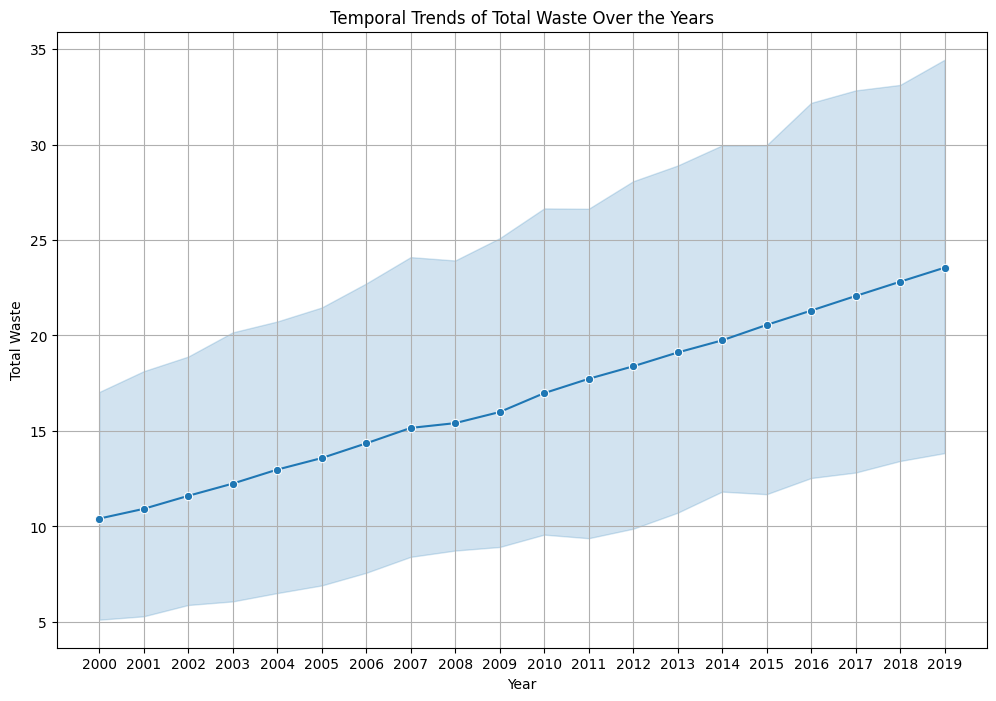

In [9]:
##TEMPORAL TRENDS OF WASTE OVER THE YEARS

plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='total_waste', data=plastic_df, marker='o')
plt.title('Temporal Trends of Total Waste Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Waste')
plt.grid(True)
plt.xticks(plastic_df['time'].unique())
plt.show()

In [10]:
##ABSOLUTE GROWTH OF TOTAL WASTE PER REGION

#'Total_waste' is the column representing total waste and 'Time' represents the years
initial_values_2000 = plastic_df.loc[plastic_df['time'] == 2000].groupby('location')['total_waste'].sum().values
final_values_2019 = plastic_df.loc[plastic_df['time'] == 2019].groupby('location')['total_waste'].sum().values

# Calculating growth rate for each region
growth_rates = ((final_values_2019 - initial_values_2000) / abs(initial_values_2000)) * 100

# Printing results for each region
unique_regions = np.unique(plastic_df['location'].values)
for region in range(len(growth_rates)):
    print(f"Region/Country: {unique_regions[region]}")
    print(f"Initial Value 2000: {initial_values[region]:.2f}")
    print(f"Final Value 2019: {final_values_2019[region]:.2f}")
    print(f"Absolute Growth Rate from 2000 to 2019: {growth_rates[region]:.2f}%")
    print("\n")

Region/Country: Canada


NameError: name 'initial_values' is not defined

In [11]:
##ABSOLUTE GROWTH OF TOTAL WASTE IN TOTAL

initial_total_value_2000 = plastic_df.loc[plastic_df['time'] == 2000, 'total_waste'].sum()
final_total_value_2019 = plastic_df.loc[plastic_df['time'] == 2019, 'total_waste'].sum()

# Calculating overall growth rate for all countries
overall_growth_rate = ((final_total_value_2019 - initial_total_value_2000) / abs(initial_total_value_2000)) * 100

# Printing overall results
print(f"Overall Initial Value 2000: {initial_total_value_2000:.2f}")
print(f"Overall Final Value 2019: {final_total_value_2019:.2f}")
print(f"Overall Absolute Growth Rate from 2000 to 2019: {overall_growth_rate:.2f}%")



Overall Initial Value 2000: 156.17
Overall Final Value 2019: 353.29
Overall Absolute Growth Rate from 2000 to 2019: 126.22%


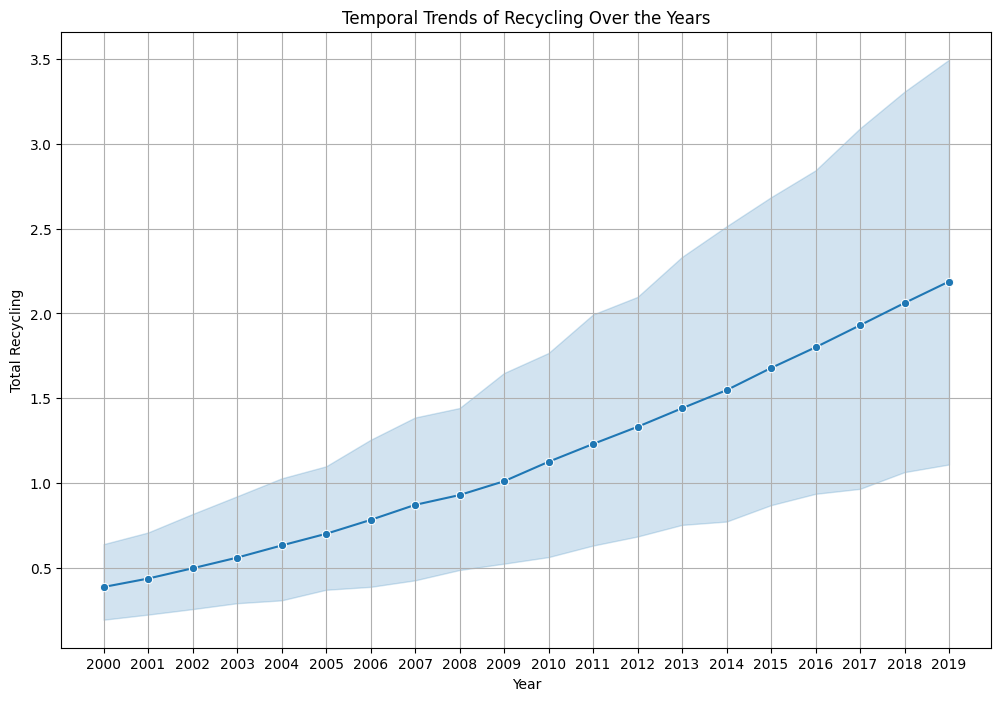

In [12]:
##TEMPORAL TREND OF RECYCLING OVER THE YEARS

plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='recycled_waste', data=plastic_df, marker='o')
plt.title('Temporal Trends of Recycling Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Recycling')
plt.grid(True)
plt.xticks(plastic_df['time'].unique())
plt.show()

In [13]:
##ABSOLUTE GROWTH OF RECYCLING PER REGION BETWEEN 2000 AND 2019

initial_values_2000 = plastic_df.loc[plastic_df['time'] == 2000].groupby('location')['recycled_waste'].sum().values
final_values_2019 = plastic_df.loc[plastic_df['time'] == 2019].groupby('location')['recycled_waste'].sum().values

# Calculate growth rate for each region
growth_rates = ((final_values_2019 - initial_values_2000) / abs(initial_values_2000)) * 100

# Print results for each region
unique_regions = np.unique(plastic_df['location'].values)
for region in range(len(growth_rates)):
    print(f"Region/Country: {unique_regions[region]}")
    print(f"Initial Recycled Waste 2000: {initial_values_2000[region]:.2f}")
    print(f"Final Recycled Waste 2019: {final_values_2019[region]}")
    print(f"Absolute Growth Rate of Recycled Waste from 2000 to 2019: {growth_rates[region]:.2f}%")
    print("\n")



Region/Country: Canada
Initial Recycled Waste 2000: 0.13
Final Recycled Waste 2019: 0.42892
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 237.66%


Region/Country: China
Initial Recycled Waste 2000: 0.82
Final Recycled Waste 2019: 8.376888
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 922.44%


Region/Country: India
Initial Recycled Waste 2000: 0.18
Final Recycled Waste 2019: 2.469077
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 1294.07%


Region/Country: Latin America
Initial Recycled Waste 2000: 0.33
Final Recycled Waste 2019: 1.992802
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 501.17%


Region/Country: Middle East & North Africa
Initial Recycled Waste 2000: 0.19
Final Recycled Waste 2019: 0.921618
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 375.56%


Region/Country: OECD Asia
Initial Recycled Waste 2000: 0.23
Final Recycled Waste 2019: 1.463308
Absolute Growth Rate of Recycled Waste from 2000 to 2019: 536.70%


Region

In [14]:
##ABSOLUTE GROWTH OF TOTAL RECYCLING BETWEEN 2000 AND 2019

initial_total_value_2000 = plastic_df.loc[plastic_df['time'] == 2000, 'recycled_waste'].sum()
final_total_value_2019 = plastic_df.loc[plastic_df['time'] == 2019, 'recycled_waste'].sum()

# Calculating overall growth rate 
overall_growth_rate = ((final_total_value_2019 - initial_total_value_2000) / abs(initial_total_value_2000)) * 100

# Printing overall results
print(f"Overall Initial Value 2000: {initial_total_value_2000:.2f}")
print(f"Overall Final Value 2019: {final_total_value_2019:.2f}")
print(f"Overall Absolute Growth Rate of Recycled Waste from 2000 to 2019: {overall_growth_rate:.2f}%")

Overall Initial Value 2000: 5.78
Overall Final Value 2019: 32.83
Overall Absolute Growth Rate of Recycled Waste from 2000 to 2019: 467.62%


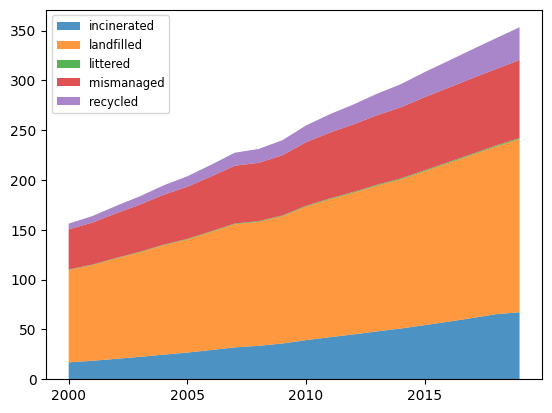

In [15]:
##Annual plastic waste by disposal method, World, 2000 to 2019

custom_time_steps = np.arange(2000, 2019, 5)

grouped_data = plastic_df.groupby('time').agg({
    'incinerated_waste': 'sum',
    'landfilled_waste': 'sum',
    'littered_waste': 'sum',
    'mismanaged_waste': 'sum',
    'recycled_waste': 'sum'}).reset_index()

merged_df = pd.merge(plastic_df, grouped_data, on='time', suffixes=('', '_total'))

plt.stackplot(merged_df['time'],
              [merged_df['incinerated_waste_total'], merged_df['landfilled_waste_total'],
               merged_df['littered_waste_total'], merged_df['mismanaged_waste_total'], merged_df['recycled_waste_total']],
              labels=['incinerated', 'landfilled', 'littered', 'mismanaged', 'recycled'],
              alpha=0.8)
plt.xticks(custom_time_steps)
plt.legend(loc=2, fontsize='small')
plt.show()

In [16]:
##CORRELATIONS

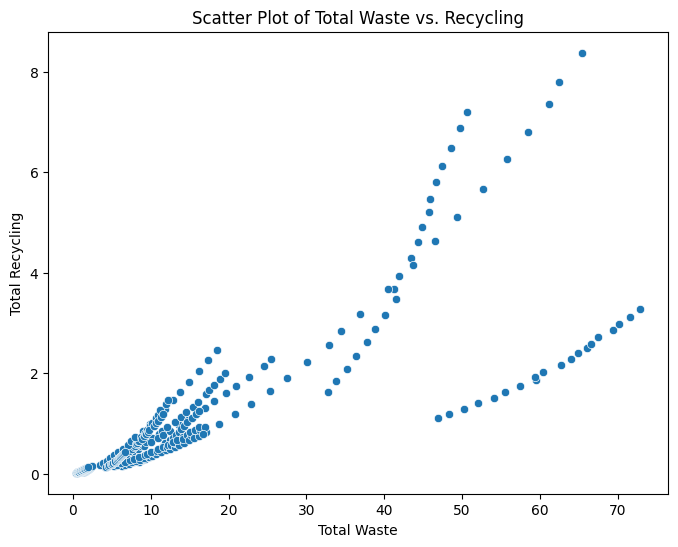

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_waste', y='recycled_waste', data=plastic_df)
plt.title('Scatter Plot of Total Waste vs. Recycling')
plt.xlabel('Total Waste')
plt.ylabel('Total Recycling')
plt.show()

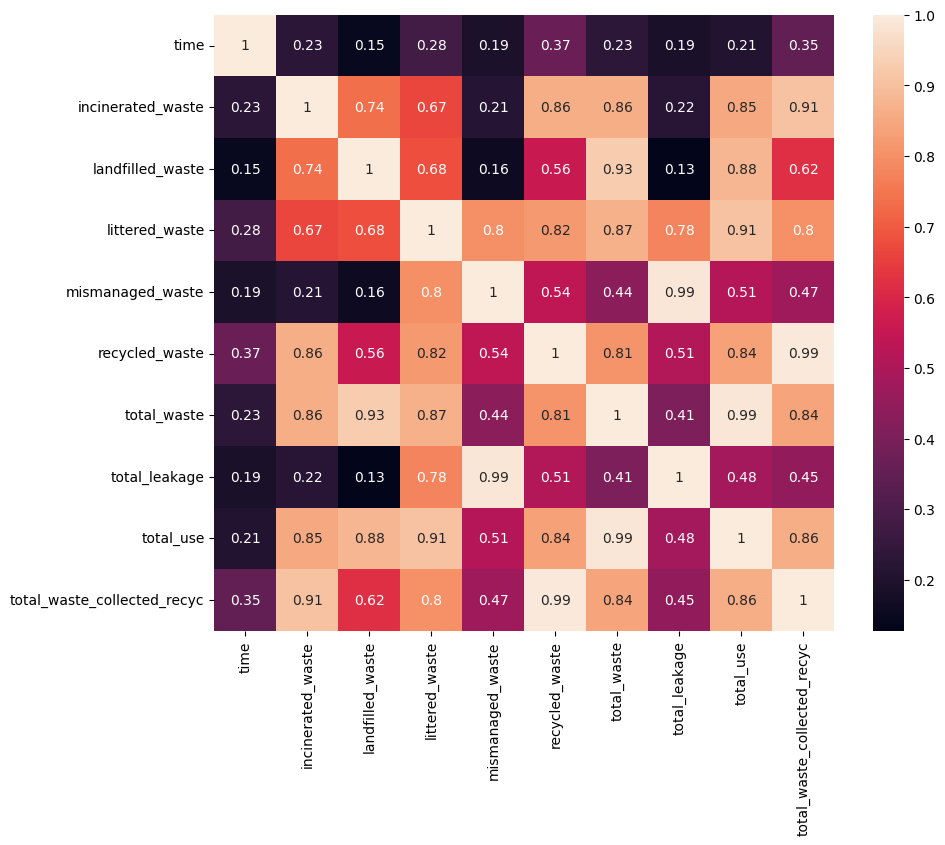

In [18]:
corr_matrix=plastic_df.select_dtypes(np.number).corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

There are a lot of correlations between the numerical data columns.